In [13]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def generate_differences_df(spectra_df, background_sample, start_idx=2, stop_idx=-9):
    # Convert DataFrames to PyTorch tensors
    spectra = spectra_df.iloc[:,start_idx:stop_idx]
    tensor1 = torch.tensor(spectra.values, dtype=torch.float32)
    tensor2 = torch.tensor(background_sample.values, dtype=torch.float32)

    # Move tensors to GPU if available
    if torch.cuda.is_available():
        tensor1 = tensor1.cuda()
        tensor2 = tensor2.cuda()

    differences = tensor1.unsqueeze(1) - tensor2.unsqueeze(0)

    differences_np = differences.cpu().numpy()  # move differences to cpu

    # Reshape the differences to 2D for DataFrame creation
    m, p, n = differences_np.shape
    differences_reshaped = differences_np.reshape(m * p, n)

    # Create a DataFrame from the reshaped array
    differences_df = pd.DataFrame(differences_reshaped)
    # round to two decimal places
    differences_df = differences_df.astype(float).round(2)

    index_col = np.repeat(spectra_df['index'].values, p)
    differences_df.insert(0, 'index', index_col)
    label_info = pd.DataFrame(np.repeat(spectra_df.iloc[:,stop_idx:].values, p, axis=0))
    differences_df = pd.concat([differences_df, label_info], axis=1)

    # if spectra_df.columns[0] == 'level_0':
    #     differences_df.columns = spectra_df.columns[1:]
    # else:
    differences_df.columns = spectra_df.columns[start_idx-1:]

    return differences_df

In [14]:
def plot_ims_spectrum(
        spectrum, chem_label, real_or_synthetic, 
        preprocessing_type='Spectrum', save_plot_path=None,
        rip_start_col=None, rip_stop_col=None
        ):
    # x axis should run from lowest drift time (184) to highest drift time (184 + len(spectrum)//2)
    numbers = range(184, (len(spectrum)//2)+184)

    plt.plot(numbers, spectrum[:len(numbers)], label='Positive')
    if rip_start_col is not None:
        plt.axvline(x=rip_start_col, color='red', linestyle='--')
        plt.axvline(x=rip_stop_col, color='red', linestyle='--')

    plt.plot(numbers, spectrum[len(numbers):], label='Negative')
    plt.title(f'{real_or_synthetic} {chem_label} {preprocessing_type}', fontsize=20)
    plt.xlabel('Drift Time', fontsize=16)
    plt.ylabel('Ion Intensity', fontsize=16)
    plt.legend(fontsize=14)

    if save_plot_path is not None:
        plt.savefig(save_plot_path, format='png', dpi=300)
    plt.show()

In [ ]:
spectra = pd.read_feather('../../scratch/val_data.feather')
avg_bkg = pd.read_csv('../../scratch/val_avg_bkg.csv')

In [20]:
bkg = pd.read_feather('../../scratch/val_bkg.feather')

In [21]:
bkg.head()

,level_0,index,p_184,p_185,p_186,p_187,p_188,p_189,p_190,p_191,...,n_1013,n_1014,n_1015,n_1016,n_1017,n_1018,n_1019,n_1020,n_1021,Label
0,27130,56880,86.0,90.0,92.0,96.0,99.0,102.0,104.0,108.0,...,-12.0,-15.0,-17.0,-18.0,-16.0,-14.0,-11.0,-9.0,-7.0,BKG
1,306028,954161,64.0,69.0,72.0,76.0,80.0,82.0,85.0,90.0,...,-12.0,-12.0,-10.0,-10.0,-8.0,-6.0,-9.0,-10.0,-11.0,BKG
2,143961,592589,105.0,107.0,110.0,114.0,117.0,122.0,127.0,131.0,...,-32.0,-32.0,-33.0,-35.0,-37.0,-40.0,-41.0,-42.0,-45.0,BKG
3,140126,563054,99.0,102.0,106.0,110.0,115.0,121.0,128.0,136.0,...,-6.0,-6.0,-5.0,-5.0,-4.0,-3.0,-3.0,-2.0,-2.0,BKG
4,210133,756015,94.0,98.0,104.0,108.0,112.0,116.0,119.0,123.0,...,-21.0,-22.0,-23.0,-26.0,-25.0,-24.0,-23.0,-22.0,-20.0,BKG


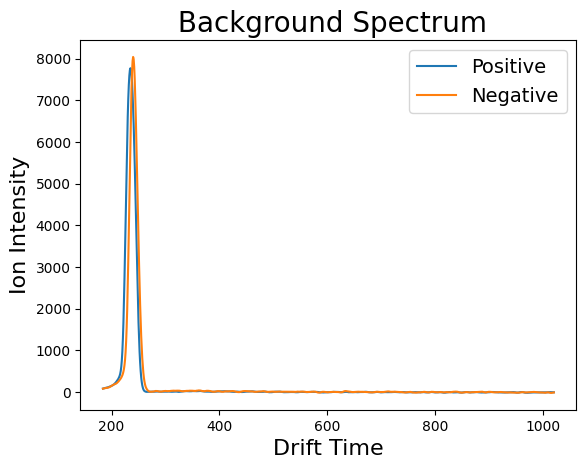

In [22]:
plot_ims_spectrum(bkg.iloc[0,2:-1], 'Background', '', 'Spectrum')

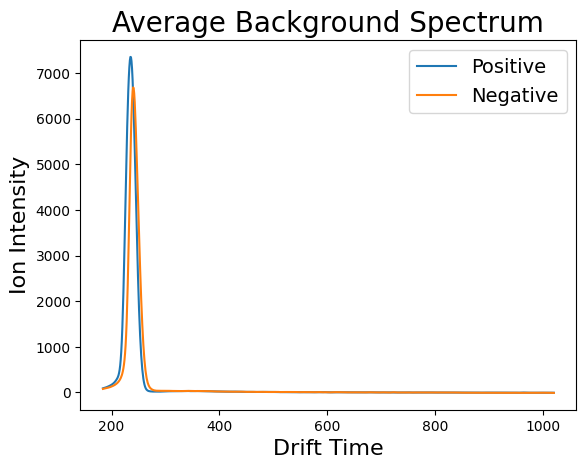

In [17]:
plot_ims_spectrum(avg_bkg.iloc[0,1:], 'Background', 'Average', 'Spectrum')